<a href="https://www.kaggle.com/code/electromarine/comp-2-backpack-prediction?scriptVersionId=225026774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


### Let's explore train data

In [2]:
#importing important libraries
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
100*df.isnull().mean()

id                      0.000000
Brand                   3.235000
Material                2.782333
Size                    2.198333
Compartments            0.000000
Laptop Compartment      2.481333
Waterproof              2.350000
Style                   2.656667
Color                   3.316667
Weight Capacity (kg)    0.046000
Price                   0.000000
dtype: float64

In [5]:
object_col=[]
for col in df.columns:
    if df[col].dtype=="O":
        object_col.append(col)
print(object_col) 


['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


In [6]:
#Handling the missing values in categorical features by imputing the mode (most frequest class)

df[object_col]=df[object_col].apply(lambda x: x.fillna(x.mode()[0]) if x.isna else x)

In [7]:
# Checkingthe missing percentage again
100*df.isnull().mean()

id                      0.000
Brand                   0.000
Material                0.000
Size                    0.000
Compartments            0.000
Laptop Compartment      0.000
Waterproof              0.000
Style                   0.000
Color                   0.000
Weight Capacity (kg)    0.046
Price                   0.000
dtype: float64

In [8]:
#Handling the missing row values in ordinal feature by imputing mean value of that feature
df["Weight Capacity (kg)"]=df["Weight Capacity (kg)"].fillna(df["Weight Capacity (kg)"].median())

In [9]:
# Checking the missing percentage again
100*df.isnull().mean()

id                      0.0
Brand                   0.0
Material                0.0
Size                    0.0
Compartments            0.0
Laptop Compartment      0.0
Waterproof              0.0
Style                   0.0
Color                   0.0
Weight Capacity (kg)    0.0
Price                   0.0
dtype: float64

In [10]:
df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,5.443590,18.030012,81.411107
std,86602.684716,2.890766,6.965312,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.099086,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.001145,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [11]:
# Creating a dummy variable for the categorical variables and dropping the first one.
for col in object_col:
    dummies = pd.get_dummies(df[col], dtype=int, drop_first=True, prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=[col], inplace=True)

df.head(-1)

,id,Compartments,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,7.0,11.611723,112.15875,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,10.0,27.078537,68.88056,1,0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
2,2,2.0,16.643760,39.17320,0,0,0,1,1,0,...,1,1,0,1,0,0,0,0,0,1
3,3,8.0,12.937220,80.60793,0,1,0,0,0,1,...,1,1,0,1,0,0,0,1,0,0
4,4,1.0,17.749338,86.02312,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,299994,4.0,20.392117,113.59984,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
299995,299995,9.0,12.730812,129.99749,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
299996,299996,6.0,26.633182,19.85819,1,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
299997,299997,9.0,11.898250,111.41364,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


## Data preps for model building

In [12]:
# Putting feature variables to X
X = df.drop('Price',axis=1)

# Putting target variable to y
y = df['Price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Building a Random forest (Black-Box) Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

In [16]:
rf=RandomForestRegressor(random_state=100,n_jobs=-1)

In [17]:
#Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 6,8, 10],
    'min_samples_leaf': [50,100],
    'max_features': [10,16,19],#inc 13
    'n_estimators': [10,30] #inc 40
}

In [18]:
#Define the custom scoring function for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

In [19]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params,
                           cv=4, 
                           verbose=-1, 
                           scoring = rmse_scorer)

In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             param_grid={'max_depth': [1, 2, 6, 8, 10],
                         'max_features': [10, 16, 19],
                         'min_samples_leaf': [50, 100],
                         'n_estimators': [10, 30]},
             scoring=make_scorer(mean_squared_error, squared=False),
             verbose=-1)

In [21]:
# Use the best estimator from GridSearchCV
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=10, max_features=16, min_samples_leaf=50,
                      n_estimators=10, n_jobs=-1, random_state=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


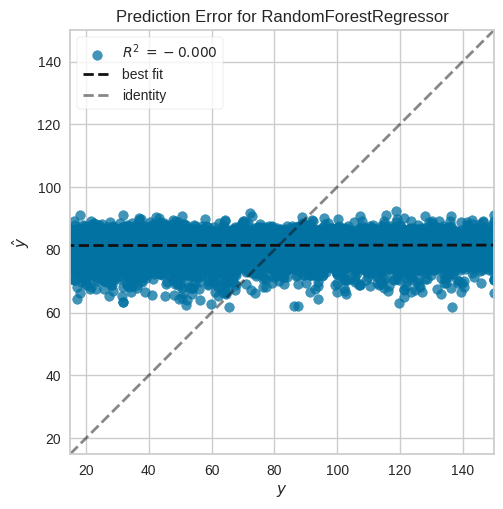

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
 from yellowbrick.regressor import PredictionError


# Create the prediction error plot using the best estimator
visualizer = PredictionError(rf_best)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure


#------------ 1st model R-squared:0.048

In [23]:
df_test=pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
df_test

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...,...
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [24]:
100*df_test.isnull().mean()

id                      0.0000
Brand                   3.1135
Material                2.8065
Size                    2.1905
Compartments            0.0000
Laptop Compartment      2.4810
Waterproof              2.4055
Style                   2.5765
Color                   3.3925
Weight Capacity (kg)    0.0385
dtype: float64

In [25]:
object_col=[]
for col in df_test.columns:
    if df_test[col].dtype=="O":
        object_col.append(col)
print(object_col) 

['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


In [26]:
#Handling the missing values in categorical features by imputing the mode (most frequest class)

df_test[object_col]=df_test[object_col].apply(lambda x: x.fillna(x.mode()[0]) if x.isna else x)

In [27]:
100*df_test.isnull().mean()

id                      0.0000
Brand                   0.0000
Material                0.0000
Size                    0.0000
Compartments            0.0000
Laptop Compartment      0.0000
Waterproof              0.0000
Style                   0.0000
Color                   0.0000
Weight Capacity (kg)    0.0385
dtype: float64

In [28]:
#Handling the missing row values in ordinal feature by imputing mean value of that feature
df_test["Weight Capacity (kg)"]=df_test["Weight Capacity (kg)"].fillna(df_test["Weight Capacity (kg)"].median())

In [29]:
100*df_test.isnull().mean()

id                      0.0
Brand                   0.0
Material                0.0
Size                    0.0
Compartments            0.0
Laptop Compartment      0.0
Waterproof              0.0
Style                   0.0
Color                   0.0
Weight Capacity (kg)    0.0
dtype: float64

In [30]:
# Creating a dummy variable for the categorical variables and dropping the first one.
for col in object_col:
    dummies = pd.get_dummies(df_test[col], dtype=int, drop_first=True, prefix=col)
    df_test = pd.concat([df_test, dummies], axis=1)
    df_test.drop(columns=[col], inplace=True)

df_test.head(-1)

,id,Compartments,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,300000,2.0,20.671147,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,300001,7.0,13.564105,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,300002,9.0,11.809799,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,300003,1.0,18.477036,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,300004,2.0,9.907953,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,499994,10.0,21.824702,1,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,1,0
199995,499995,2.0,7.383498,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
199996,499996,9.0,6.058394,0,1,0,0,0,0,1,...,1,0,1,1,0,0,0,0,1,0
199997,499997,9.0,26.890163,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0


In [31]:
predictions = grid_search.predict(df_test)

In [32]:
# Creating a DataFrame with 'id' and 'price'
submission_df = pd.DataFrame({
    'id': df_test['id'],  
    'Price': predictions
})

# Saving the DataFrame as an .csv file
submission_df.to_csv('submission.csv', index=False)
print(submission_df.head())

       id      Price
0  300000  84.401979
1  300001  81.009411
2  300002  82.069561
3  300003  91.574949
4  300004  80.610466
